In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Drug dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [2]:
# Import the dataset
data = pd.read_csv("data/drugs.csv")
# Show the first few rows
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
# Look at the total amount of rows and columns
data.shape

(200, 6)

<AxesSubplot: xlabel='Drug', ylabel='count'>

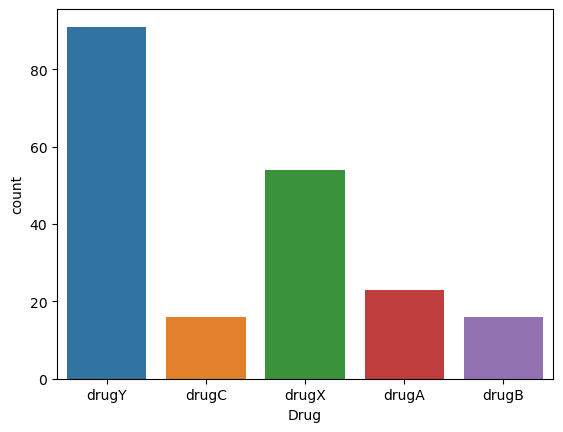

In [5]:
# Show the distribution of the target column
sns.countplot(data, x="Drug")

In [7]:
# Split into features and target
X = data.drop("Drug", axis = 1)
y = data.Drug

In [24]:
# Find a way to change the categorical (text) features into numeric features.
# Different options are available. The best one being LabelEncoder():
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# 
# Other options are one-hot encoding and pd.get_dummies functions
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
le = LabelEncoder()

X.Sex = le.fit_transform(X.Sex)
print(f"Sex: {list(le.classes_)}")
X.BP = le.fit_transform(X.BP)
print(f"BP: {list(le.classes_)}")
X.Cholesterol = le.fit_transform(X.Cholesterol)
print(f"Chol: {list(le.classes_)}")

Sex: ['F', 'M']
BP: ['HIGH', 'LOW', 'NORMAL']
Chol: ['HIGH', 'NORMAL']


In [26]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [27]:
# Split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 19)

In [28]:
# Create a random forest classifier model. Set max_depth parameter to 2
# You also might wanna play with the class_weight parameter
ForestModel = RandomForestClassifier(max_depth=2, class_weight="balanced")
# Fit the model
ForestModel.fit(X_train, y_train)
# Print the score on the test set
print(f"Train score: {ForestModel.score(X_train, y_train)}")
print(f"Train score: {ForestModel.score(X_test, y_test)}")

Train score: 0.99375
Train score: 0.95


[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  2  8  0]
 [ 0  0  0  0 17]]


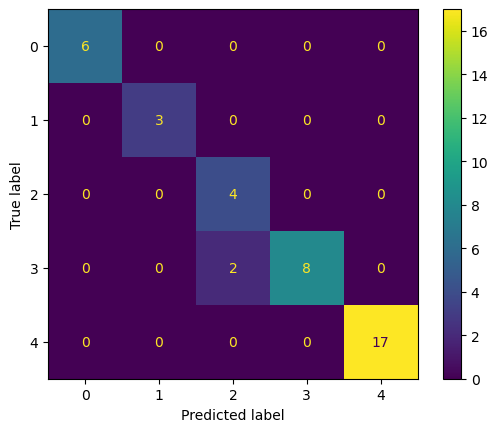

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.80      0.89        10
       drugY       1.00      1.00      1.00        17

    accuracy                           0.95        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.97      0.95      0.95        40



In [37]:
# Predict values for the test set
y_pred_test = ForestModel.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_pred_test))

cf = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_pred_test))

## Hyperparameter optimizations
Use a grid, random or bayes search to do some hyperparameter optimizations.

For possible hyperparameters to tune, take a look at the documentation of random forest trees:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Keep max_depth at 1 and/or 2, as otherwise, your tree would get everything right in the training set.

Note there is not really a right answer. It's just about trying different things and seeing if you can implement a search yourself.

In [41]:
from sklearn.model_selection import GridSearchCV
# Optimizations
ForrMod=RandomForestClassifier() # Default penalty is l2
# All the parameters we want to test
parameters = [{"max_depth":[2,4,6],  
               "criterion":["gini", "entropy"],
               "n_estimators":[50,100,150],
               "max_features":["sqr","log2",None],
               "class_weight":["balanced", "balanced_subsample", None],
               "max_samples":[0.5,0.7,0.9]
              }] 

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=ForrMod,
                           n_jobs=-1, 
                           cv = 5,
                           param_grid=parameters,             
                           verbose=5
                           )
# Fit the training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, 

[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=10

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=10

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=100;, score=0.938 total time=   0.1s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.1s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=None, max_samples=0.5, n_estimators=50;, score=1.000 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=None, max_samples=0.5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=None, max_samples=0.5, n_estimators=150;, score=0.969 total time=   0.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=6, max_features=None, max_samples

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=1.000 total time=   0.4s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.4s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.2s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=4, max_features=None, max_sample

[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, max_features=sqr, max_samples

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.3s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=150;, score=0.969 total time=   0.4s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=150;, score=1.000 total time=   0.2s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_feat

[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.4s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=50;, score=0.938 total time=   0.1s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=50;, score=0.969 total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=50;, score=1.000 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features=log2, max_samples=0.9, n_estimators=150;, score=0.969 total time=   0.2s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=4, max_features

[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=100;, score=0.938 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, max_samples=0.5, n_estimators=50;, score=1.000 total time=   0.1s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, max_samples=0.5, n_estimators=50;, score=0.969 total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=6, max_featur

[CV 3/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, max_samples=0.9, n_estimators=100;, score=0.938 total time=   0.1s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, max_samples=0.9, n_estimators=100;, score=0.906 total time=   0.1s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, max_samples=0.9, n_estimators=100;, score=0.844 total time=   0.1s
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=log2, max_samples=0.9, n_estimators=150;, score=0.938 total time=   0.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=None, max_samples=0.7, n_estimators=100;, score=0.656 total time=   0.1s
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, max_depth=2, max_features=None, max_samples=0.7, n_estimators=100;, score=0.656 total time=   0.1s
[CV 3/5] END class_weight=balanced

[CV 3/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=50;, score=0.938 total time=   0.1s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, max_depth=4, max_features=log2, max_samples=0.7, n_estimators=50;, score=0.969 total time=   0.1s
[CV 5/5] END class_weight=balanced_subsample, 

[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=sqr, max_samples=0.5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced_sub

[CV 3/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=150;, score=0.969 total time=   0.2s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=150;, score=0.969 total time=   0.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.7, n_estimators=100;, score=0.938 total time=   0.1s
[CV 4/5] END class_weight

[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=0.969 total time=   0.2s
[CV 4/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=0.969 total time=   0.1s
[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=0.906 total time=   0.1s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=150;, score=0.938 total time=   0.2s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END cla

[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced

[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=150;, score=1.000 total time=   0.3s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.3s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, max_samples=0.5, n_estimators=100;, score=1.000 total time=   0.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END cla

[CV 2/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=2, max_features=sqr, max_samples=0.9, n_estimators=50;, score=nan total time=  

[CV 5/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, max_samples=0.9, n_estimators=150;, score=0.969 total time=   0.3s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=50;, score=0.906 total time=   0.0s
[CV 5/5] END class_weight=None, criterion=gini, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=50;, score=0.844 total time=   0.0s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=0.906 total time=   0.1s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=2, max_features=log2, max_samples=0.5, n_estimators=100;, score=0.938 total time=   0.1s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=2, max_features=log2, max_sa

[CV 1/5] END class_weight=None, criterion=gini, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=150;, score=0.906 total time=   0.1s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=4, max_features=log2, max_samples=0.5, n_estimators=150;, score=0.938 total time=   0.2s
[CV 5/5] END class_weight=None, criterion=gini, max_depth=4, max_features=log2, max_samples=0.9, n_estimators=150;, score=0.969 total time=   0.2s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=4, max_features=None, max_samples=0.5, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=4, max_features=None, max_samples=0.5, n_estimators=50;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=4, max_features=None, max_samples=0.5, n_estimators=50;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=4, max_features=None, max_samples=0.5, n_estimators=50;, score=

[CV 2/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=50;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=50;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=50;, score=0.969 total time=   0.1s
[CV 1/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=100;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=None, criterion=gini, max_depth=6, max_features=None, max_samples=0.7, n_estimators=100;, score=

[CV 5/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.7, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=sqr, max_samples=0.9, n_estimators=50;, s

/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_params
    v

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6],
                          'max_features': ['sqr', 'log2', None],
                          'max_samples': [0.5, 0.7, 0.9],
                          'n_estimators': [50, 100, 150]}],
             verbose=5)

In [43]:
# Print the score of the best model of your search
print(f"Score of best model: {grid_search.score(X_test,y_test)}")

# Print the parameters that give you the best model
print("\nBest parameters:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Score of best model: 1.0

Best parameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'max_samples': 0.5, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='log2', max_samples=0.5)


## Boosting
Try now to also create a boosted model for the random forest trees and test the model.

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


estimators = [('logisticModel',LogisticRegression(C=10, solver='liblinear')),
              ('nbModel',MultinomialNB(alpha=1)),
              ('dtModel',RandomForestClassifier(max_depth=4))] 

stackClassifier = StackingClassifier(estimators=estimators)
# Fit data
stackClassifier.fit(X_train,y_train)
# Predict testing data
y_pred = stackClassifier.predict(X_test)

[CV 3/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.2s
[CV 5/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=None, max_samples=0.9, n_estimators=100;, score=0.969 total time=   0.1s
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=None, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.2s
[CV 2/5] END class_weight=None, criterion=entropy, max_depth=4, max_features=None, max_samples=0.9, n_estimators=150;, score=1.000 total time=   0.2s
[CV 2/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=50;, score=0.938 total time=   0.0s
[CV 3/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n

[CV 3/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.5, n_estimators=150;, score=0.969 total time=   0.2s
[CV 4/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.2s
[CV 5/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.5, n_estimators=150;, score=1.000 total time=   0.2s
[CV 1/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.7, n_estimators=50;, score=1.000 total time=   0.1s
[CV 3/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=50;, score=0.969 total time=   0.1s
[CV 4/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_estimators=50;, score=1.000 total time=   0.1s
[CV 5/5] END class_weight=None, criterion=entropy, max_depth=6, max_features=log2, max_samples=0.9, n_e

Train score: 1.0
Test score: 0.975
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  2  8  0]
 [ 0  0  0  0 17]]


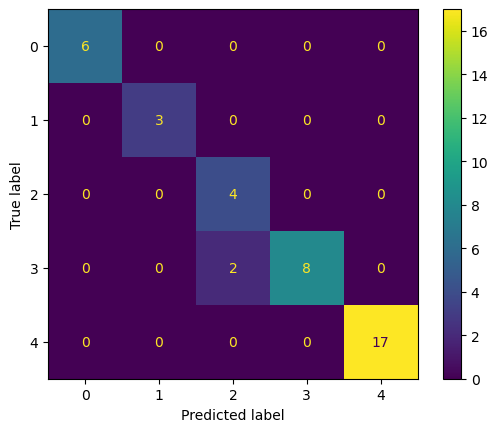

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.80      0.89        10
       drugY       1.00      1.00      1.00        17

    accuracy                           0.95        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.97      0.95      0.95        40



In [49]:
print(f"Train score: {stackClassifier.score(X_train, y_train)}")
print(f"Test score: {stackClassifier.score(X_test, y_test)}")

y_pred_test = ForestModel.predict(X_test)

# Print a confusion matrix and classification report
print(confusion_matrix(y_test,y_pred_test))

cf = confusion_matrix(y_test,y_pred_test)
matrix = ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()

print(classification_report(y_test,y_pred_test))